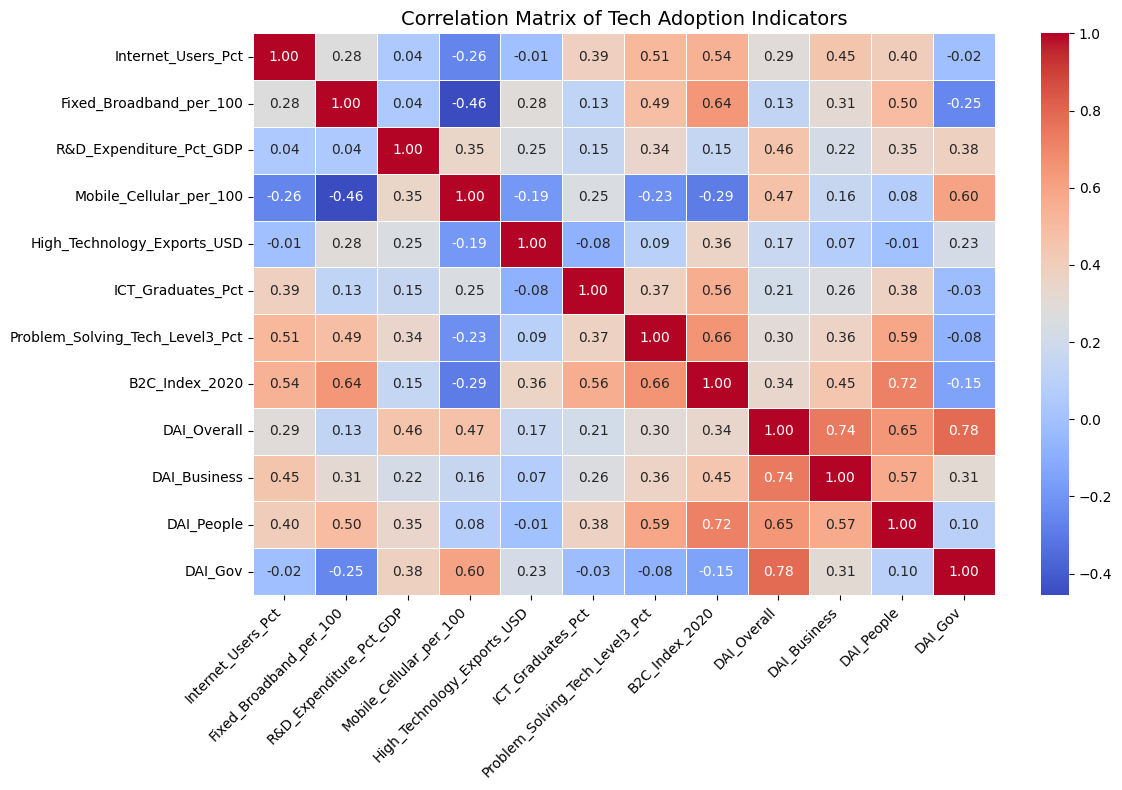

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your original dataset
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)

# Step 2: Compute the correlation matrix
correlation_matrix = df.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Tech Adoption Indicators", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


No variables need to be removed due to extremely high correlation (r > 0.9) and no redundant 1-to-1 relationships

* B2C_Index_2020 and DAI_People (r = 0.72) have a high positive correlation, likely because both relate to individual access and readiness.

* DAI_Overall and DAI_Business (r = 0.74) show strong correlation — possibly due to how sub-indices aggregate.

* DAI_Overall and DAI_Gov (r = 0.78) are highly related, suggesting overlap between overall index and government digital maturity.

The DAI stats are meant to be closely correlated but each having their down differences at the same time so I am keeping these data.

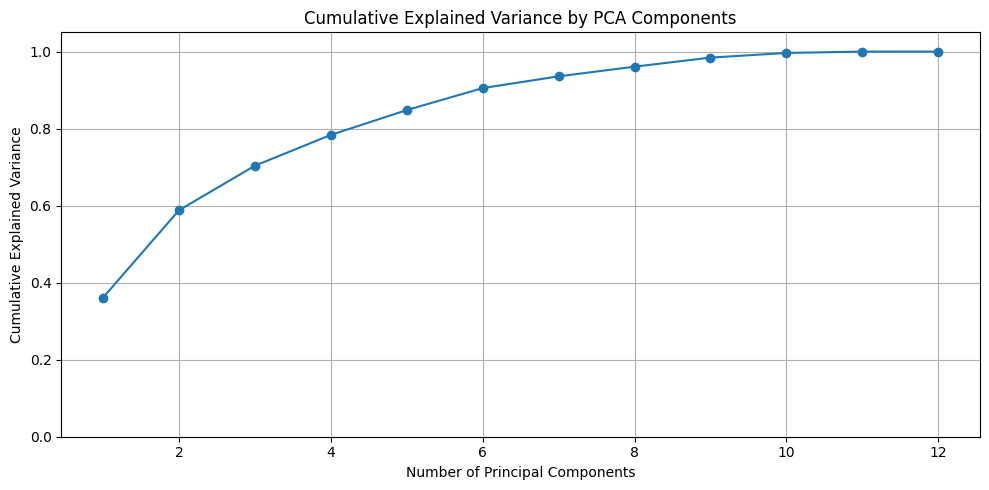


Top Loadings:
                                      PC1       PC2       PC3
Internet_Users_Pct               0.301568 -0.155797 -0.226198
Fixed_Broadband_per_100          0.275072 -0.320934  0.254587
R&D_Expenditure_Pct_GDP          0.209091  0.271569  0.210540
Mobile_Cellular_per_100          0.007755  0.525151 -0.243432
High_Technology_Exports_USD      0.117315 -0.017885  0.713068
ICT_Graduates_Pct                0.255316 -0.012659 -0.457041
Problem_Solving_Tech_Level3_Pct  0.357506 -0.175041 -0.043055
B2C_Index_2020                   0.402205 -0.240963  0.039952
DAI_Overall                      0.344703  0.381613  0.074405
DAI_Business                     0.352446  0.140919 -0.046724
DAI_People                       0.407916  0.005138 -0.104491
DAI_Gov                          0.107932  0.518169  0.202468


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load pre-normalized dataset
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)

# Step 2: Standardize features (Z-score)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Run PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Step 4: Scree Plot (explained variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.ylim(0, 1.05)  # <-- ensures scale starts at 0 and shows full variance up to 1
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: PCA Loadings (feature contributions)
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(df.columns))],
                        index=df.columns)

# Optional: Show first few loadings
print("\nTop Loadings:")
print(loadings.iloc[:, :3])  # Top 3 components



In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get original feature names
variables = df.columns

# --- Top 5 Loadings for PC1 ---
pc1_loadings = pd.Series(pca.components_[0], index=variables)
top5_pc1 = pc1_loadings.abs().sort_values(ascending=False).head(5).index

print("🔷 Top 5 PC1 Loadings:")
for var in top5_pc1:
    print(f"{var:40s} {pc1_loadings[var]: .4f}")

# --- Top 5 Loadings for PC2 ---
pc2_loadings = pd.Series(pca.components_[1], index=variables)
top5_pc2 = pc2_loadings.abs().sort_values(ascending=False).head(5).index

print("\n🔷 Top 5 PC2 Loadings:")
for var in top5_pc2:
    print(f"{var:40s} {pc2_loadings[var]: .4f}")


🔷 Top 5 PC1 Loadings:
DAI_People                                0.4079
B2C_Index_2020                            0.4022
Problem_Solving_Tech_Level3_Pct           0.3575
DAI_Business                              0.3524
DAI_Overall                               0.3447

🔷 Top 5 PC2 Loadings:
Mobile_Cellular_per_100                   0.5252
DAI_Gov                                   0.5182
DAI_Overall                               0.3816
Fixed_Broadband_per_100                  -0.3209
R&D_Expenditure_Pct_GDP                   0.2716


Top Countries by PC1 Score:
Country Name
Sweden           2.779264
Denmark          2.482964
Finland          2.198966
Germany          2.064264
Netherlands      1.979336
Norway           1.756040
Estonia          1.206108
Austria          1.089023
New Zealand      0.546445
Israel           0.221341
United States    0.034657
Australia       -0.118110
Canada          -0.328651
Ireland         -0.911185
Lithuania       -1.873656
Slovenia        -2.260788
Poland          -3.121352
Chile           -3.695713
Greece          -4.048953
Name: PC1, dtype: float64
Top Countries by PC2 Score:
Country Name
Israel           2.858644
Chile            2.416692
Estonia          1.925808
Lithuania        1.874931
Austria          1.778158
Germany          0.733224
Slovenia         0.497645
Poland           0.426610
Finland          0.320980
Sweden           0.290453
Netherlands      0.076074
United States   -0.392553
Denmark         -0.827544
Norway          -1.063334
Australia       -1.932733
Ireland 

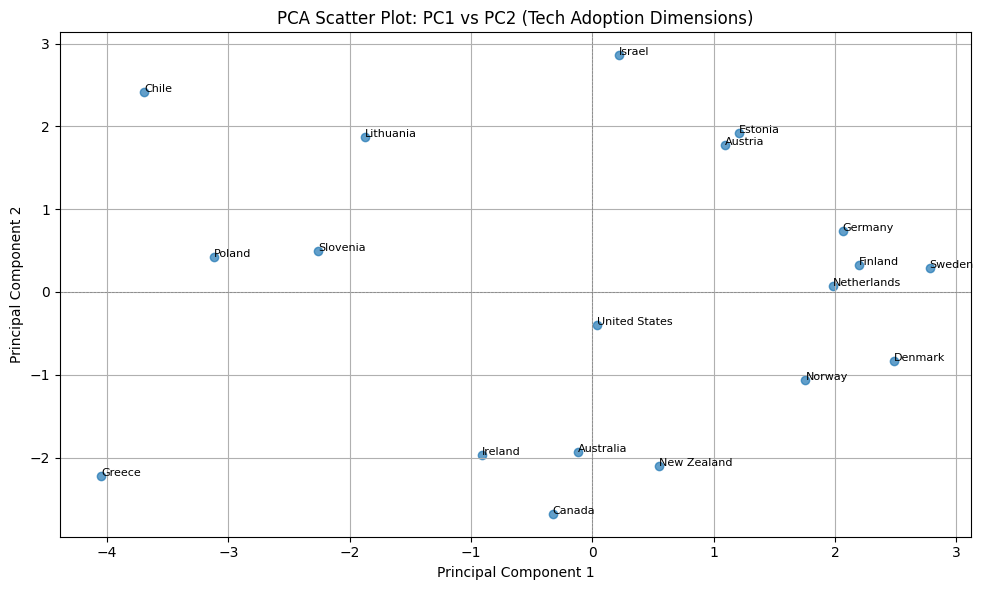

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(df_scaled)

# Create DataFrame of PCA scores with country names
pca_scores = pd.DataFrame(pca_data, index=df.index, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# === Step 1: Rank countries by PC1 ===
pc1_ranking = pca_scores['PC1'].sort_values(ascending=False)
print("Top Countries by PC1 Score:")
print(pc1_ranking)

pc2_ranking = pca_scores['PC2'].sort_values(ascending=False)
print("Top Countries by PC2 Score:")
print(pc2_ranking)

# === Step 2: Scatter plot of PC1 vs PC2 ===
plt.figure(figsize=(10, 6))
plt.scatter(pca_scores['PC1'], pca_scores['PC2'], alpha=0.7)

# Annotate each point with country name
for country in pca_scores.index:
    plt.text(pca_scores.loc[country, 'PC1'], pca_scores.loc[country, 'PC2'], country, fontsize=8)

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot: PC1 vs PC2 (Tech Adoption Dimensions)")
plt.grid(True)
plt.tight_layout()
plt.show()



<h4>1. PC1 (General Tech Readiness & Population Access)</h4>
Explained Variance: ~39%
Top Contributors (high absolute loadings):

- B2C_Index_2020

- DAI_People

- Problem_Solving_Tech_Level3_Pct

- DAI_Business

- DAI_Overall

Interpretation:
PC1 captures the core dimension of population-level tech readiness. It heavily reflects:

- Digital access and usage (B2C index, internet users),

- Digital skills (problem solving in tech-rich environments),

- People’s digital engagement (DAI_People), and

- Business integration of digital tools.

This component effectively separates countries that have strong digital infrastructure and skilled populations from those that are lagging in digital literacy and access.

Policy Implication:
High PC1 scores indicate a solid foundation for tech adoption at scale. Countries scoring low should invest in broadband access, digital literacy, and inclusive digital policies.

<h4>2. <b>PC2 (Government Enablement & Mobile Infrastructure)</b></h4>
Explained Variance: ~15.7%
Top Contributors:

- Mobile_Cellular_per_100

- DAI_Gov

- R&D_Expenditure_Pct_GDP

- DAI_Overall

- Fixed_Broadband_per_100

Interpretation:
PC2 distinguishes between countries based on their:

- Government-led digital transformation (DAI_Gov),

- Mobile-first infrastructure (cellular subscriptions), and

- National innovation capacity (R&D spending).

High PC2 countries have governments playing an active role in digital transformation, especially through mobile and innovation strategies while low PC2 countries may rely more on broadband or have weaker public-sector digital efforts.

Policy Implication:
High PC2 suggests government is actively enabling digital tech, particularly in mobile-first strategies. Countries with low PC2 scores might benefit from stronger digital governance frameworks and more mobile-centric public services.

Countries positioned far to the right are high adopters of core digital infrastructure and skills while countries above on PC2 are likely emphasizing mobile penetration or R&D.

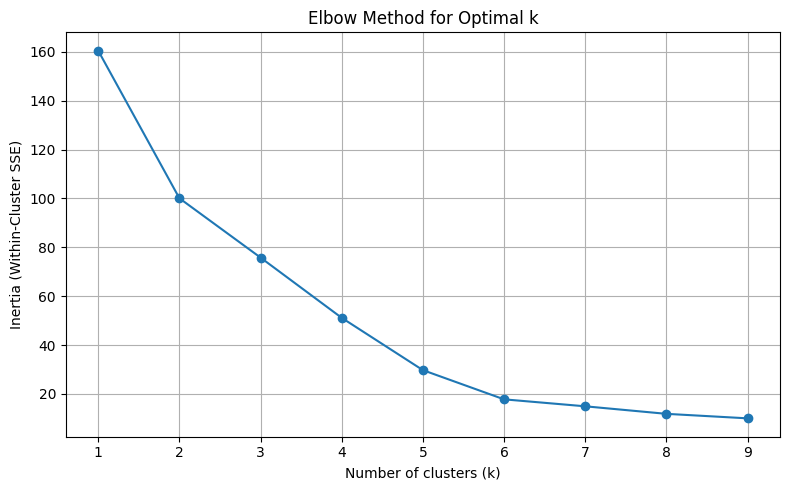

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load and scale original data
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
scaled = StandardScaler().fit_transform(df)

# Step 2: PCA transform
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled)

# Step 3: Elbow method to find best k
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


We are taking k=3 for the elbow bend/diminishing returns

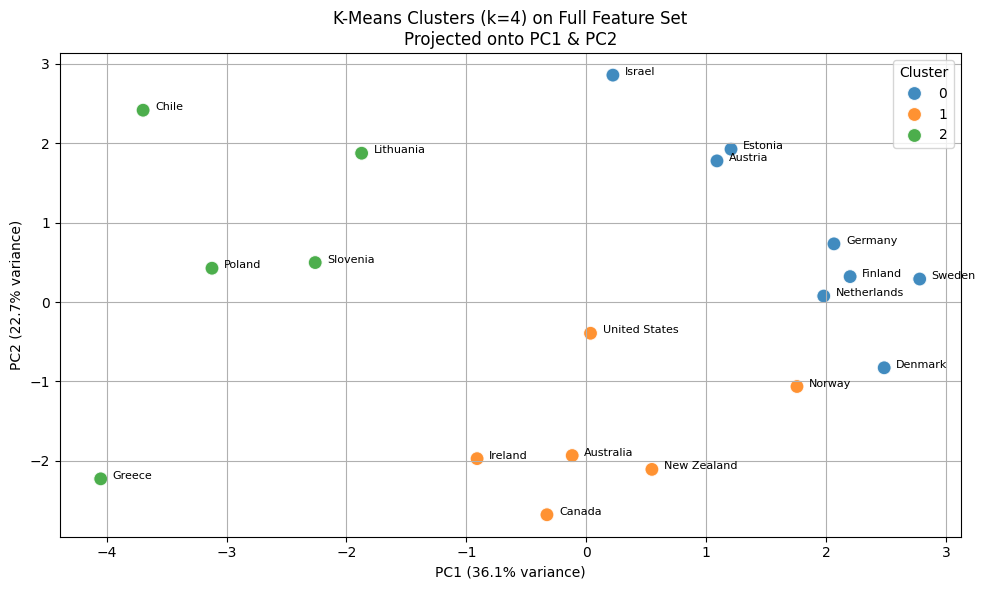

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
countries = df.index

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# KMeans clustering (k=3 based on elbow)
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels = kmeans.fit_predict(scaled_data)

# PCA for 2D projection
pca_vis = PCA(n_components=2, random_state=42)
vis_scores = pca_vis.fit_transform(scaled_data)

# Combine into a DataFrame
vis_df = pd.DataFrame(vis_scores, columns=["PC1", "PC2"])
vis_df["Country"] = countries
vis_df["Cluster"] = labels

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=vis_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    s=100, alpha=0.85
)

# Annotate points with country names
for i in range(len(vis_df)):
    plt.text(
        vis_df["PC1"][i] + 0.1,
        vis_df["PC2"][i],
        vis_df["Country"][i],
        fontsize=8
    )

plt.title("K-Means Clusters (k=4) on Full Feature Set\nProjected onto PC1 & PC2")
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

# Compute silhouette score using PCA-transformed data
score = silhouette_score(scaled_data, labels)

print(f"Silhouette Score for k=3: {score:.4f}")


Silhouette Score for k=3: 0.2036


K‑Means silhouette in PCA space (k=3): 0.288


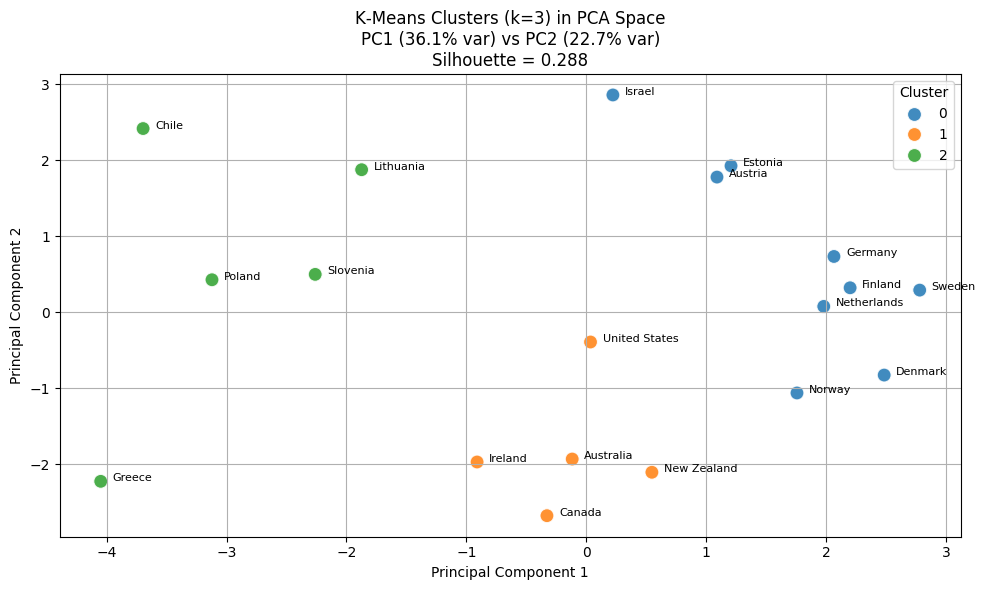

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your data
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
countries = df.index

# Step 1: Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: PCA (fit 5D PCA for clustering)
pca_full = PCA(n_components=5, random_state=42)
X_pca5 = pca_full.fit_transform(scaled_data)

# Step 3: KMeans clustering on PCA-reduced data
km_pca = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels_pca = km_pca.fit_predict(X_pca5)

# Step 4: Evaluate with Silhouette Score
sil_pca = silhouette_score(X_pca5, labels_pca)
print(f"K‑Means silhouette in PCA space (k=3): {sil_pca:.3f}")

# Step 5: Reduce to 2D for plotting
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(scaled_data)

vis_df = pd.DataFrame(X_vis, columns=["PC1", "PC2"])
vis_df["Country"] = countries
vis_df["Cluster"] = labels_pca

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=vis_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    s=100, alpha=0.85
)

# Add country names
for i in range(len(vis_df)):
    plt.text(
        vis_df["PC1"][i] + 0.1,
        vis_df["PC2"][i],
        vis_df["Country"][i],
        fontsize=8
    )

plt.title(
    f"K‑Means Clusters (k=3) in PCA Space\n"
    f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f}% var) vs "
    f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f}% var)\n"
    f"Silhouette = {sil_pca:.3f}"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


Both cluster return the same amount of cluster with a similar grouping

<b>🟦 Cluster 0 (Blue): High PC1, Medium to High PC2</b>
Countries: Germany, Sweden, Netherlands, Finland, Denmark, Estonia, Austria, Israel

High overall tech adoption:

- Strong infrastructure (broadband, mobile)

- High internet usage and ICT graduate levels

- Above average R&D investment and exports

Well-rounded digital maturity:

High performance across Digital Adoption Index (DAI) dimensions: people, business, and government

These are the top-performing, digitally advanced countries.

<b>🟧 Cluster 1 (Orange): Low PC1, Low to Medium PC2</b>
Countries: United States, Canada, Australia, New Zealand, Ireland, Norway

- Mixed digital outcomes:

- Infrastructure and connectivity are generally good

- Lower R&D expenditure and tech export figures than Cluster 0

- Inconsistent DAI scores — especially in government and people components

These countries have good foundations but lag slightly in innovation output or integration.

<b>🟩 Cluster 2 (Green): Low to Medium PC1, Variable PC2</b>
Countries: Greece, Chile, Poland, Lithuania, Slovenia

- Emerging or transitional economies:

- Lower R&D intensity and tech export volumes

- Moderate to low broadband and cellular penetration

- Less consistent DAI scores, often weaker in business/government digitalization

These countries are in earlier stages of tech adoption or digital integration.

<h3> DBSCAN <h3>

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load and standardize data
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
scaled = StandardScaler().fit_transform(df)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"], index=df.index)

# Grid search over DBSCAN parameters
best_score = -1
best_params = {}
eps_values = np.linspace(0.5, 3.0, 20)
min_samples_values = range(2, 8)

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(pca_df)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            score = silhouette_score(pca_df, labels)
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'silhouette_score': score
                }

# Output the best parameters found
print("✅ Best DBSCAN Parameters:")
print(f"  eps = {best_params['eps']:.2f}")
print(f"  min_samples = {best_params['min_samples']}")
print(f"  clusters = {best_params['n_clusters']}")
print(f"  silhouette score = {best_params['silhouette_score']:.3f}")


✅ Best DBSCAN Parameters:
  eps = 1.42
  min_samples = 3
  clusters = 3
  silhouette score = 0.465


We use the found optimal parameters to do DBSCAN

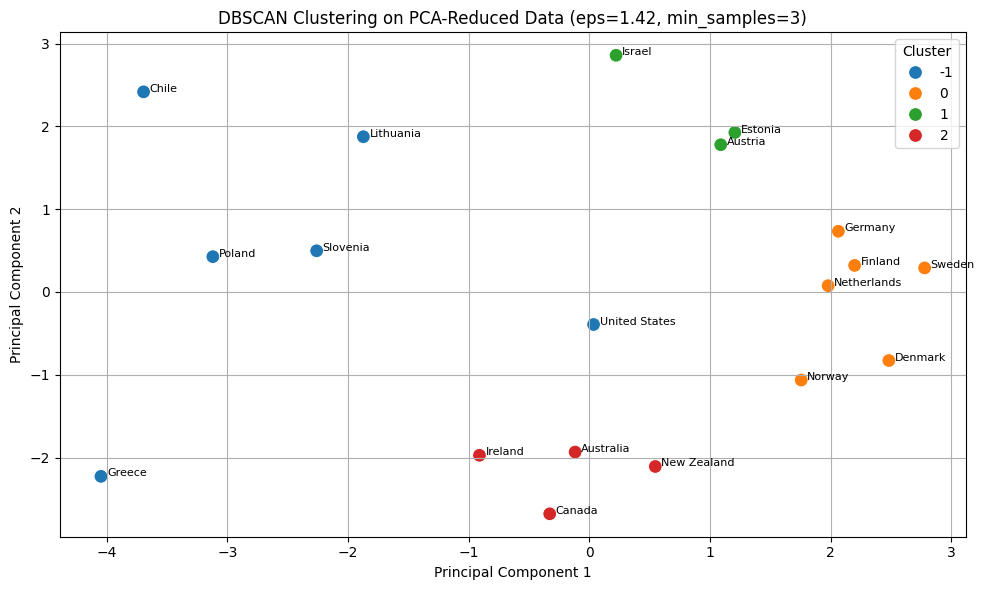

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize data
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
scaled = StandardScaler().fit_transform(df)

# PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"], index=df.index)

# Apply DBSCAN with optimal parameters
optimal_eps = 1.42
optimal_min_samples = 3
db = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
labels = db.fit_predict(pca_df)
pca_df["Cluster"] = labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=100)

# Annotate points
for country, row in pca_df.iterrows():
    plt.text(row["PC1"] + 0.05, row["PC2"], country, fontsize=8)

plt.title(f"DBSCAN Clustering on PCA-Reduced Data (eps={optimal_eps}, min_samples={optimal_min_samples})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


There are 4 clusters, including noise(-1) which has 6 data

It is not displayed in a binary elite/non-elite divide but a 3-tier model:

- One cluster likely represents digitally advanced countries.

- One middle-tier group shows partial integration.

- One cluster may include countries with emerging or inconsistent adoption metrics.

I think the DBSCAN results are not as good as PCA when split into 4 clusters and some data being on the verge cannot be clustered well such as United States.

<h3> Hierarchical Clustering

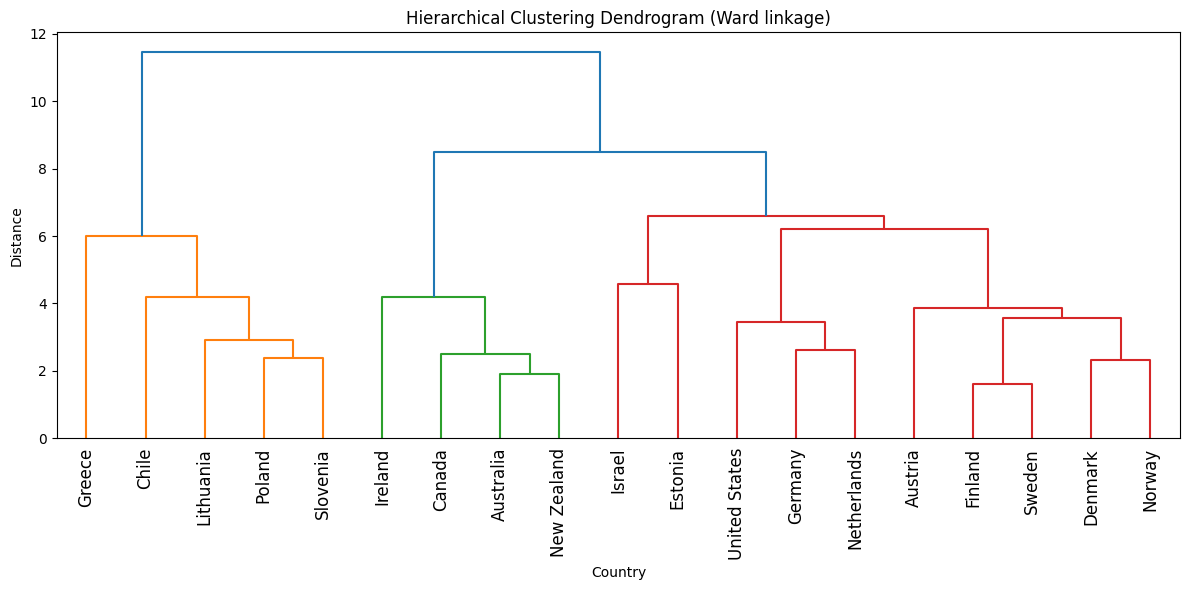

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 1: Load and standardize the data
df = pd.read_csv("final_tech_adoption_index_data.csv", index_col=0)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Perform hierarchical clustering using Ward linkage
Z = linkage(scaled_data, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index.tolist(), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Step 4: Choose number of clusters and assign labels
num_clusters = 3  # You can adjust this
labels = fcluster(Z, num_clusters, criterion='maxclust')



These clusters broadly align with patterns observed in the PCA projection and show internal coherence in key technology and digital adoption metrics.

The clusters also partially overlap with DBSCAN and K-Means result

<b>1. Red Cluster (Cluster 3)</b>
Countries in this group are the digital frontrunners, characterized by:

- he highest R&D investment (3.08% of GDP),

- Strong digital infrastructure (top broadband and mobile penetration),

- High export volume in high-tech sectors, and

- Superior digital adoption indicators (DAI scores across all categories).

These are nations with deep integration of technology into both economy and policy, leading the global tech adoption curve.

<b>2. Green Cluster (Cluster 2)</b>
This group exhibits:

- Very high internet and broadband coverage,

- Strong ICT graduate pipeline and excellent problem-solving skills, and

- A high B2C e-commerce index.

However, they lag in R&D investment and government digitization (DAI_Gov). These countries have embraced consumer-facing tech but may face challenges in systemic integration and innovation policy.

<b>3. Orange Cluster (Cluster 1)</b>
Countries in this cluster show:

- Moderate scores across most indicators,

- Lower values in tech exports, DAI metrics, and R&D intensity,

- Variability in digital skills and infrastructure readiness.

They represent nations at a transitional stage, integrating technology but not yet having full ecosystem-wide benefits.